<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/08_Image_DFT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

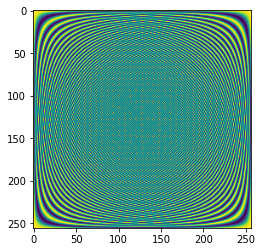

In [ ]:
n = 256

w = np.exp(-1j*2*np.pi/n)

# Discrete Fourier Transform Matrix
J, K = np.meshgrid(np.arange(n), np.arange(n))
DFT = np.power(w, J*K)
DFT = np.real(DFT)

plt.imshow(DFT)
plt.show()

# Ez is érdekes

https://youtu.be/h7apO7q16V0?t=401

Legyen két függvényünk

$$
A(x) = x^2 + 2x + 1
$$

$$
B(x) = x^2 - 2x + 1
$$

mindkettőből vegyünk 5 pontot -2-től +2-ig 1 esével.


[[-2  1]
 [-1  0]
 [ 0  1]
 [ 1  4]
 [ 2  9]]


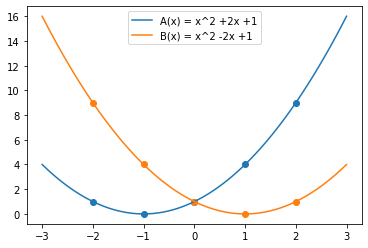

In [ ]:
def A(x):
  return x**2 + 2*x + 1

def B(x):
  return x**2 - 2*x + 1

x = np.array([-2,-1,0,1,2])

yA = A(x)
yB = B(x)

xyA = np.array([x,yA]).T
xyB = np.array([x,yB]).T
print(xyA)

_x = np.linspace(-3, 3, 100)
_yA = A(_x)
_yB = B(_x)

plt.scatter(x,yA)
plt.scatter(x,yB)
plt.plot(_x,_yA, label='A(x) = x^2 +2x +1')
plt.plot(_x,_yB, label='B(x) = x^2 -2x +1')
plt.legend()
plt.show()

Na most jön a trükk, legyen

$$
C(x) = A(x) \cdot B(x)
$$

Nos, ehhez össze kell szoroznunk a két pont reprezántációt, valahogy így.

$A(x) = [(-2,1), (-1,0), (0,1), (1,4), (2,9)] \times$

$B(x) = [(-2,9), (-1,4), (0,1), (1,0), (2,1)] = $

$C(x) = [(-2,9), (-1,0), (0,1), (1,0), (2,9)]$

Ha valaki megkérdezi, hogy miért ez az eredmény, akkor fogalmam sincs, de nézzük meg, hogy numpy haver mit mond. Hát nem ezt, de akkor nézzük, hogy miért ez az eredmény. Mivel itt pontokról van szó, ezért $x$-et megtartjuk, és csak $y$ párokat szorozzuk össze.



```
xyA[:,1] * xyB[:,1]
array([9, 0, 1, 0, 9])
```

valahogy így

```
C = np.array([x, xyA[:,1] * xyB[:,1]]).T

array([[-2,  9],
       [-1,  0],
       [ 0,  1],
       [ 1,  0],
       [ 2,  9]])
```


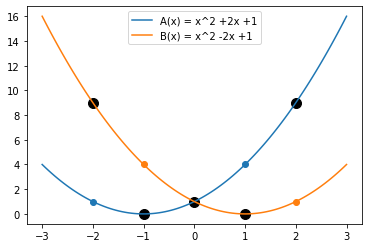

In [ ]:
C = np.array([x, xyA[:,1] * xyB[:,1]]).T

plt.scatter(x,yA)
plt.scatter(x,yB)
plt.plot(_x,_yA, label='A(x) = x^2 +2x +1')
plt.plot(_x,_yB, label='B(x) = x^2 -2x +1')
plt.scatter(x, C[:,1], s=100, c='black')
plt.legend()
plt.show()

A fekete pontok a $A(x) \cdot B(x)$

A megoldás egyébként:

$$
C(x) = A(x) \cdot B(x) = 
$$
$$
x^2 + 2x + 1 \cdot 
$$
$$
x^2 - 2x + 1
$$
$$
= x^4 -2x^2 + 1
$$




Na ezt valahogy úgy számolta ki, hogy van

Pont kifejezés módunk:
$$ \left\{ (x_0, P(x_0)),(x_1, P(x_1)),(x_2, P(x_2)),(x_3, P(x_3)), (x_4, P(x_4)) \right\}$$

és a polinomiális kifejezés módunk:

$$P(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3 + p_4 x^4$$

A pontreprezentációból úgy kapjuk meg a polinomiális kifejezést, hogy

$$ \begin{bmatrix} P(x_0) \\ P(x_1) \\ P(x_2) \\ P(x_3) \\ P(x_4) \end{bmatrix} = \begin{bmatrix} 1 & x_0 & x_0^2 & x_0^2 & x_0^4 \\  1 & x_1 & x_1^2 & x_1^3 & x_1^4 \\ 1 & x_2 & x_2^2 & x_2^3 & x_2^4 \\ 1 & x_3 & x_3^2 & x_3^3 & x_3^4 \\ 1 & x_4 & x_4^2 & x_4^3 & x_4^4 \end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \\ p_4 \end{bmatrix}$$

Gyönyörű, akkor ezt most valahogy meg kellene oldani.






# Lineáris egyenletrendszer - A puding próbája az evés

$
\hspace{0.43 cm}4x  + 3y = 20
$

$
-5x + 9y = 26
$

Számos megoldása létezik ennek az egyenletrendszernek. A változók elliminálása, a Cramer féle szabály, és a mátrix megoldás. Ahhoz, hogy megoldjuk az egyenletet meg kell találnunk a megfelő $x$-et és $y$-t.

A fenti egyenletet mátrix formában felirva a következőt kapjuk. $\mathbf{A}x = \mathbf{B}$
<br><br>
$$\begin{bmatrix}4 & 3\\-5 & 9\end{bmatrix} \times \begin{bmatrix} x\\ y \end{bmatrix} = \begin{bmatrix}20 \\ 26\end{bmatrix}
$$

In [22]:
A = np.array([[4, 3], [-5, 9]])
B = np.array([20, 26])

Hogy megtaláljuk az egyenletünkhöz tartozó $x$ és $y$ értékét, ezért vehetjük a skaláris szorzatát az $\mathbf{A^{-1}}$ és $\mathbf{B}$ mátrixoknak.

Szóval először meg kell keresnünk $\mathbf{A}$ inverzét és utána vennünk kell a két mátrix skaláris szorzatát.

In [13]:
invA = np.linalg.inv(A)

invA

array([[ 0.17647059, -0.05882353],
       [ 0.09803922,  0.07843137]])

In [14]:
X = np.linalg.inv(A).dot(B)

# ugyan az
# X = np.dot(invA, B)

X

array([2., 4.])

A két lépést le lehet redukálni az np.linalg.solve() függvénnyel, ugyan azt az eredményt kapjuk.

In [16]:
X = np.linalg.solve(A, B)

X

array([2., 4.])

## Példa

Tegyük fel, hogy van egy zöldségesünk. Az egyik nap eladott 20 darab almát és 10 narancsot összesen 3500 forintért.

A másik nap eladott 17 almát és 22 narancsot 5000 forintért.

A két napon az alma és a narancs ára ugyan annyi volt. Mennyibe kerül egy alma és egy narancs?

In [18]:
A = np.array([[20, 10], [17, 22]])
B = np.array([3500, 5000])

X = np.linalg.solve(A, B)

X

array([100., 150.])

## Na ennek ismeretében térjünk vissza az eredeti példához

$$ \begin{bmatrix} P(x_0) \\ P(x_1) \\ P(x_2) \\ P(x_3) \\ P(x_4) \end{bmatrix} = \begin{bmatrix} 1 & x_0 & x_0^2 & x_0^2 & x_0^4 \\  1 & x_1 & x_1^2 & x_1^3 & x_1^4 \\ 1 & x_2 & x_2^2 & x_2^3 & x_2^4 \\ 1 & x_3 & x_3^2 & x_3^3 & x_3^4 \\ 1 & x_4 & x_4^2 & x_4^3 & x_4^4 \end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \\ p_4 \end{bmatrix}$$

Itt kicsit másképpen írtam fel, de ugyan azok a jelölések $\mathbf{B} = \mathbf{A}x$

$\mathbf{B}$ ismert $\mathbf{A}$ ismert. Amint keresünk $x$.

In [34]:
# https://youtu.be/h7apO7q16V0?t=340

x = np.array([-2,-1,0,1,2])

y = np.array([9,0,1,0,9])
B = np.array(y)

A = np.array([[1,x[0],x[0]**2,x[0]**3,x[0]**4],
              [1,x[1],x[1]**2,x[1]**3,x[1]**4],
              [1,x[2],x[2]**2,x[2]**3,x[2]**4],
              [1,x[3],x[3]**2,x[3]**3,x[3]**4],
              [1,x[4],x[4]**2,x[4]**3,x[4]**4]])

print(B)
print(A)

X = np.linalg.solve(A,B)

X

[9 0 1 0 9]
[[ 1 -2  4 -8 16]
 [ 1 -1  1 -1  1]
 [ 1  0  0  0  0]
 [ 1  1  1  1  1]
 [ 1  2  4  8 16]]


array([ 1.,  0., -2., -0.,  1.])

Ezért a megoldás az, hogy $$C(x) = x^4 - 2x^2 + 1$$

https://youtu.be/h7apO7q16V0?t=395

Ahol
$$A(x) = x^2 + 2x + 1$$
$$B(x) = x^2 - 2x + 1$$

$$C(x) = A(x) \cdot B(x)$$

$$C(x) = x^4 -2x^2 + 1$$


In [36]:
print('C(x) = ', X[4], '*x^4 + ', X[3], '*x^3 + ', X[2], '*x^2 + ', X[1], '*x + ', X[0])

C(x) =  1.0 *x^4 +  -0.0 *x^3 +  -2.0 *x^2 +  0.0 *x +  1.0


## Na de, miért került ez az egész a képbe?

https://youtu.be/h7apO7q16V0?t=418

Ugye azt csináltuk, hogy volt két polinomunk $\mathbf{A}$ és $\mathbf{B}$ össze akartuk szorozni őket.

Rájöttünk, hogy sokkal könnyebb ezt úgy megtenni, hogy bizonyos $x$ értékekhez tartozó $y$ értékeiket vesszük. Ezeket az $xy$ értékpárokat szorozzuk össze.

Az így $xy$ értékpárokon pedig elvégeztük a fenti lineáris egyenletrendszer megoldását, amivel megkaptuk azt, hogy az egyesn polinomokhoz milyen coefficiens tartozik (magyarul mennyivel kell megszoroznunk)

Így jött ki a 1, 0, 2, 1. Vagyis az $x^4$ hatványt $1$-szer, a $x^3$ hatványt $0$-szor, stb.

Na ezt az egész folyamatot lehet kiváltani az **FFT**-vel.

https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy